<a href="https://colab.research.google.com/github/huune2k/BTVN_AI_8-8-2022/blob/AI_8-5-2022/Cifar10_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.datasets import cifar10

import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.utils import to_categorical

from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout

from tensorflow.keras.optimizers import RMSprop
from keras.backend import categorical_crossentropy

from keras.utils import np_utils
import cv2 as cv

In [ ]:
(x_train, y_train),(x_test,y_test)= cifar10.load_data()
x=x_test
#print(x_train[0])

In [ ]:
#convert into grayscale
x_train = np.array([cv.cvtColor(image, cv.COLOR_BGR2GRAY) for image in x_train])
x_test = np.array([cv.cvtColor(image, cv.COLOR_BGR2GRAY) for image in x_test])
print(x_test)

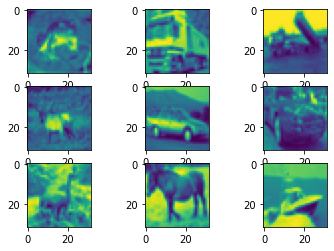

In [ ]:
for i in range(9):
  plt.subplot(330+i+1)
  plt.imshow(x_train[i])
plt.show()

In [ ]:
x_train=x_train.reshape(50000,1024)
x_test=x_test.reshape(10000,1024)
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')
x_train/=255
x_test/=255

In [ ]:
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)
print(y_train.shape)
print(y_test.shape)

(50000, 10)
(10000, 10)


In [ ]:
model = Sequential()

model.add(Dense(512, activation='relu',input_shape=(1024,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 512)               524800    
                                                                 
 dropout_2 (Dropout)         (None, 512)               0         
                                                                 
 dense_4 (Dense)             (None, 512)               262656    
                                                                 
 dropout_3 (Dropout)         (None, 512)               0         
                                                                 
 dense_5 (Dense)             (None, 10)                5130      
                                                                 
Total params: 792,586
Trainable params: 792,586
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(
    optimizer=RMSprop(),
    loss= categorical_crossentropy,
    metrics=["accuracy"]
)

In [ ]:
history = model.fit(x_train, y_train, batch_size =128 , epochs=20, verbose=1, validation_data=(x_test,y_test))

Epoch 1/20
391/391 [==============================] - 8s 20ms/step - loss: 1.6835 - accuracy: 0.4022 - val_loss: 1.6885 - val_accuracy: 0.3977
Epoch 2/20
391/391 [==============================] - 8s 20ms/step - loss: 1.6682 - accuracy: 0.4062 - val_loss: 1.6559 - val_accuracy: 0.4108
Epoch 3/20
391/391 [==============================] - 8s 20ms/step - loss: 1.6522 - accuracy: 0.4121 - val_loss: 1.6631 - val_accuracy: 0.4001
Epoch 4/20
391/391 [==============================] - 8s 20ms/step - loss: 1.6436 - accuracy: 0.4161 - val_loss: 1.6881 - val_accuracy: 0.3931
Epoch 5/20
391/391 [==============================] - 8s 20ms/step - loss: 1.6326 - accuracy: 0.4219 - val_loss: 1.6674 - val_accuracy: 0.4072
Epoch 6/20
391/391 [==============================] - 8s 20ms/step - loss: 1.6195 - accuracy: 0.4261 - val_loss: 1.6432 - val_accuracy: 0.4166
Epoch 7/20
391/391 [==============================] - 8s 20ms/step - loss: 1.6169 - accuracy: 0.4237 - val_loss: 1.6343 - val_accuracy: 0.4160

In [ ]:
model.save('final1.sav')
score = model.evaluate(x_test,y_test,verbose=1)

INFO:tensorflow:Assets written to: final1.sav/assets
313/313 [==============================] - 1s 3ms/step - loss: 1.7230 - accuracy: 0.4048


In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upper_left')

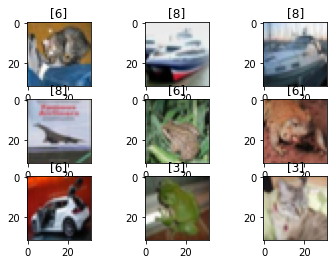

In [ ]:
y_pred = model.predict(x_test)
for i in range (9):
  plt.subplot(330+i+1)
  plt.imshow(x[i])
  plt.title([np.argmax(y_pred[i])])
plt.show()